<a href="https://colab.research.google.com/github/DevanshParmar/ICG-Summer-Program-2021-DS/blob/main/190273_DevanshParmar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a CNN Sequential Model implementation on the Fashion MNIST dataset. The code blocks which I played with and weren't effective have been deleted, and also the error-detection code sections, such as print(), type() etc. Hence the code has shortened to effectively about 100 lines.

Importing various libraries, models, layers and the dataset:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.datasets import fashion_mnist

Loading data onto our variables.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert Y_train.shape == (60000,)
assert Y_test.shape == (10000,)

Splitting training data into training and validation datasets.

In [ ]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.2, random_state=12345)
X_train.shape[0]

48000


Defining shapes, batch size and number of epochs, and reshaping dataset.

In [ ]:
im_rows = 28
im_cols = 28
n_batch_size = 500
n_epochs = 50
im_shape = (im_rows, im_cols, 1)

X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)
X_validate = X_validate.reshape(X_validate.shape[0], *im_shape)

Defining our Sequential CNN model using Conv2D, MaxPooling2D, and Dense layers, while also applying BatchNormalization and Dropout layers.

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=128, kernel_size=3, input_shape=im_shape, activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=4),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

Compiling and running our model.

In [ ]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.0008),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnnm = cnn_model.fit(
    X_train, Y_train, batch_size=n_batch_size,
    epochs=n_epochs, verbose=1,
    validation_data = (X_validate, Y_validate),
)

Epoch 1/50
96/96 [==============================] - 9s 65ms/step - loss: 1.2851 - accuracy: 0.5854 - val_loss: 0.4522 - val_accuracy: 0.8454
Epoch 2/50
96/96 [==============================] - 6s 60ms/step - loss: 0.5612 - accuracy: 0.8246 - val_loss: 0.3434 - val_accuracy: 0.8851
Epoch 3/50
96/96 [==============================] - 6s 61ms/step - loss: 0.4356 - accuracy: 0.8616 - val_loss: 0.3096 - val_accuracy: 0.8955
Epoch 4/50
96/96 [==============================] - 6s 60ms/step - loss: 0.3741 - accuracy: 0.8774 - val_loss: 0.2748 - val_accuracy: 0.9070
Epoch 5/50
96/96 [==============================] - 6s 60ms/step - loss: 0.3381 - accuracy: 0.8895 - val_loss: 0.2460 - val_accuracy: 0.9158
Epoch 6/50
96/96 [==============================] - 5s 57ms/step - loss: 0.3077 - accuracy: 0.8965 - val_loss: 0.2524 - val_accuracy: 0.9141
Epoch 7/50
96/96 [==============================] - 6s 59ms/step - loss: 0.2884 - accuracy: 0.9040 - val_loss: 0.2644 - val_accuracy: 0.9082
Epoch 8/50
96

Defining lists of various outputs, and turning accuracy into percentage. Defines the range of epochs to be plotted.

In [ ]:
loss_train = cnnm.history['loss']
loss_valid = cnnm.history['val_loss']
accu_train = [100*i for i in cnnm.history['accuracy']]
accu_valid = [100*i for i in cnnm.history['val_accuracy']]

epochs = range(1, 1+n_epochs)

              Training Loss is 0.0714
            Validation Loss is 0.2473
 
          Training Accuracy is 97.59%
        Validation Accuracy is 93.48%
 
  Maximum Training Accuracy is 97.59%
Maximum Validation Accuracy is 93.67%


Displays various output values.

In [ ]:
print('              Training Loss is {:.4f}'.format(loss_train[-1]))
print('            Validation Loss is {:.4f}'.format(loss_valid[-1]))
print(' ')
print('          Training Accuracy is {:.2f}%'.format(accu_train[-1]))
print('        Validation Accuracy is {:.2f}%'.format(accu_valid[-1]))
print(' ')
print('  Maximum Training Accuracy is {:.2f}%'.format(max(accu_train)))
print('Maximum Validation Accuracy is {:.2f}%'.format(max(accu_valid)))

Displays the plot of losses.

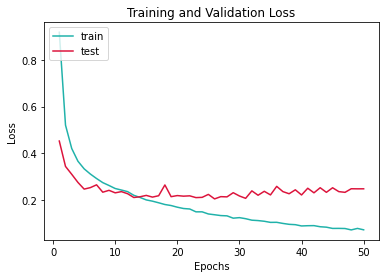

In [ ]:
plt.plot(epochs, loss_train, color='lightseagreen', label='Training Loss')
plt.plot(epochs, loss_valid, color='crimson', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Displays the plot of accuracies.

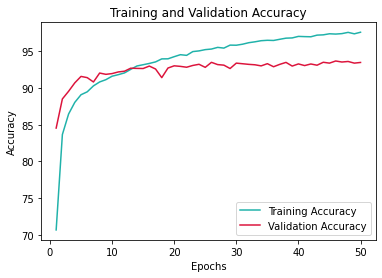

In [ ]:
plt.plot(epochs, accu_train, color='lightseagreen', label='Training Accuracy')
plt.plot(epochs, accu_valid, color='crimson', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


It shows that our model has training set accuracy of around 97.5% and validation set accuracy of around 93.5%. Hence it is overfitting by around 4%. I don't have enough time to work on it, hence leaving it as is.
References and Acknowledgements:
1. Deeplizard YouTube channel's playlist on Neural Networks was a great help: https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU
2. Mark Jay's YouTube videos also assisted: https://www.youtube.com/playlist?list=PLX-LrBk6h3wR27xylD3Rsx4bbA15jlcYC
3. For getting a hang of layers, I studied from this model: https://colab.research.google.com/github/timlovescoding/FASHION-MNIST/blob/master/Tim_Fashion_MNIST.ipynb
4. Obviously, Keras: https://keras.io/
5. For plotting the output, I studied from this site: https://www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib
6. My friends helped me greatly during this assignment. Sincere thanks to Yatish Goel, Atharv Singh Patlan, Shiven Tripathi and Ananya Gupta among others.